# 0. Install and Import Dependencies

In [1]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# 1. Read in Data and Process Dates

In [3]:
df = pd.read_csv('data_predict(2).csv')
df

,ds,y
0,2018-01-01,28.074583
1,2018-01-02,27.785833
2,2018-01-03,29.041667
3,2018-01-04,27.576667
4,2018-01-05,27.656667
...,...,...
1456,2021-12-27,26.283333
1457,2021-12-28,26.989167
1458,2021-12-29,28.327917
1459,2021-12-30,27.247917


In [4]:
df['ds'] = pd.to_datetime(df['ds'])

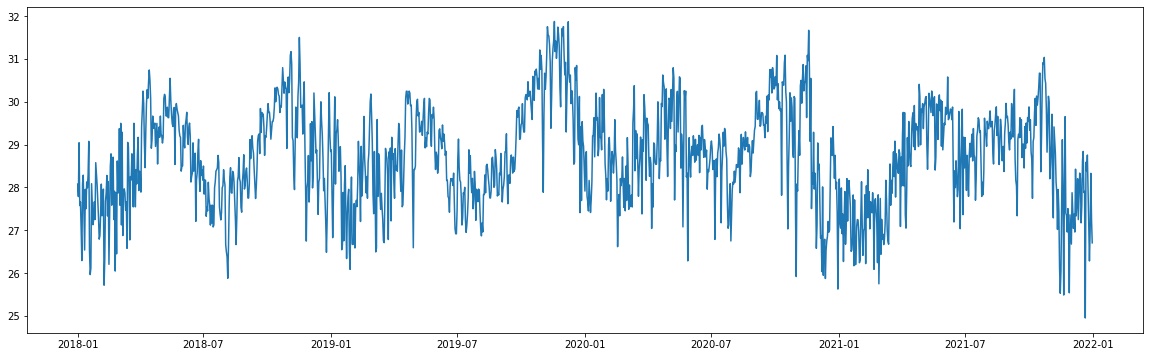

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(df['ds'], df['y'])
plt.show()

# 2. Train Model

In [6]:
m = NeuralProphet()

In [7]:
model = m.fit(df, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (229). The results might not be optimal.


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# 3. Forecast Away

In [8]:
future = m.make_future_dataframe(df, periods=2000)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.95% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.95% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-01-01,None,26.824427,28.172220,-1.354251,0.006458
1,2022-01-02,None,26.763893,28.170458,-1.382752,-0.023812
2,2022-01-03,None,26.731045,28.168695,-1.410771,-0.026880
3,2022-01-04,None,26.737986,28.166933,-1.438248,0.009300
4,2022-01-05,None,26.706589,28.165171,-1.465124,0.006543


In [9]:
plot1 = m.plot(forecast)
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': 'bee69683-f66a-429d-b59f-07c205ce3c11',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 3, 0, 0),
                          datetime.datetime(2022, 1, 4, 0, 0), ...,
                          datetime.datetime(2027, 6, 18, 0, 0),
                          datetime.datetime(2027, 6, 20, 0, 0),
                          datetime.datetime(2027, 6, 23, 0, 0)], dtype=object),
              'y': array([26.82442665, 26.73104477, 26.73798561, ..., 25.21204185, 25.08437347,
                          25.03563881])},
             {'hovertext': '',
              'marker': {'color': 'black', 'size': 4},
              'mode': '

In [10]:
plt2 = m.plot_components(forecast)
plt2

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '9b15b5c5-7d0d-46d5-b8bc-cad985c3c592',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 2, 0, 0),
                          datetime.datetime(2022, 1, 5, 0, 0), ...,
                          datetime.datetime(2027, 6, 18, 0, 0),
                          datetime.datetime(2027, 6, 20, 0, 0),
                          datetime.datetime(2027, 6, 23, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([28.17222023, 28.17045784, 28.16517067, ..., 24.65770912, 24.65418434,
                          24.64889717]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
        